In [1]:
import numpy as np
import h5py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import h5py

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow import Tensor
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Reshape, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, UpSampling2D, GlobalMaxPooling2D, Conv2DTranspose
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.models import Model, load_model
from tensorflow.python.keras.utils import layer_utils
from tensorflow.keras.utils import model_to_dot
from keras.utils.vis_utils import plot_model
from keras.callbacks import CSVLogger
import keras.models
from typing import List, Tuple
from time import time
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [4]:
h = h5py.File('new_reduced_data.h5', 'r')

In [5]:
glitches = h['new_glitches'][:]

In [6]:
glitch_labels = h['glitch_labels'][:]

In [7]:
# separating the instances
norm_data = h['new_clean'][:]
norm_labels = h['clean_labels'][:]
anom1_data = h['new_whistle'][:]
anom1_labels = h['whistle_labels'][:]
anom2_data = h['new_tomte'][:]
anom2_labels = h['tomte_labels'][:]
anom3_data = h['new_sclight'][:]
anom3_labels = h['sclight_labels'][:]

In [9]:
model = keras.models.load_model('new_circular_CNN2.h5')

In [123]:
# saliency map implementation

In [10]:
def generate_saliency_maps(model, images):
    # Convert images to tensors
    images = tf.convert_to_tensor(images, dtype=tf.float32)
    images = tf.expand_dims(images, axis=0)
    images = tf.cast(images, tf.float32)

    # Keep track of gradients
    with tf.GradientTape() as tape:
        tape.watch(images)
        reconstructed_images = model(images)

    # Compute gradients with respect to the input images
    gradients = tape.gradient(reconstructed_images, images)

    # Compute the saliency maps as the absolute mean of the gradients
    saliency_maps = tf.reduce_mean(tf.abs(gradients), axis=0)

    return saliency_maps

In [165]:
n = 3090 - 896
saliency_map = generate_saliency_maps(model, glitches[n])
saliency_map = (np.max(saliency_map) - saliency_map)/(np.max(saliency_map) - np.min(saliency_map))

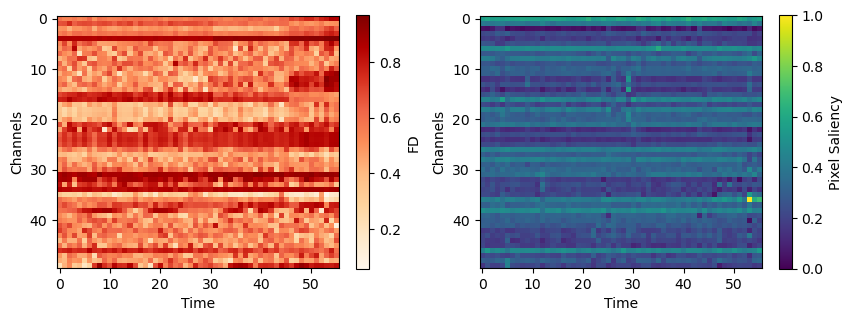

In [166]:
fig, axs = plt.subplots(figsize=(10,10), ncols=2)
pos = axs[0].imshow(glitches[n],cmap='OrRd', label='Original Glitch')
cbar = fig.colorbar(pos, ax=axs[0], shrink=0.329)
cbar.set_label('FD')
pos2 = axs[1].imshow(saliency_map, label='Saliency Map')
cbar2 = fig.colorbar(pos2, ax=axs[1], shrink=0.329)
cbar2.set_label('Pixel Saliency')
for ax in axs.flat:
    ax.set(xlabel='Time', ylabel='Channels')
plt.show()